<a href="https://colab.research.google.com/github/amilafr/algo-python-pro2/blob/main/M5L2_Loading_the_map_Working_with_text_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the map. Working with text files

[PPT M5L2 ENG](https://docs.google.com/presentation/d/1B2cXr376d_-p6Z_9CxPPQRhCvfW5rP8L6jednNppYaI/edit?usp=sharing)

# Working with text files

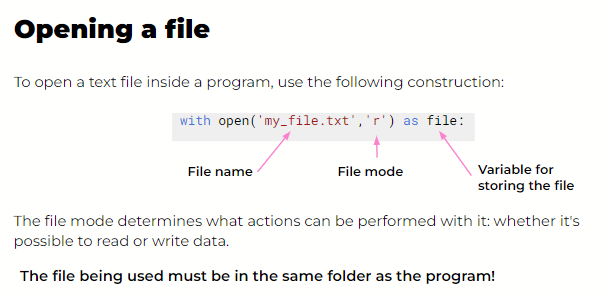

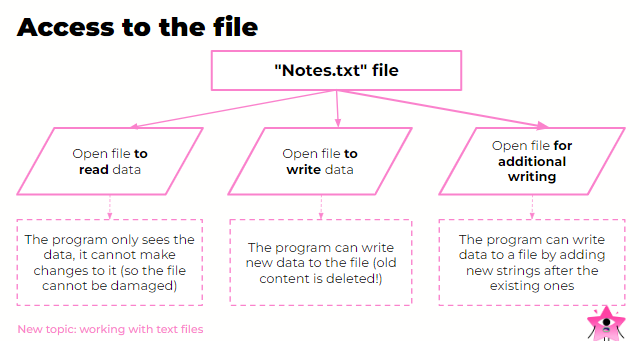

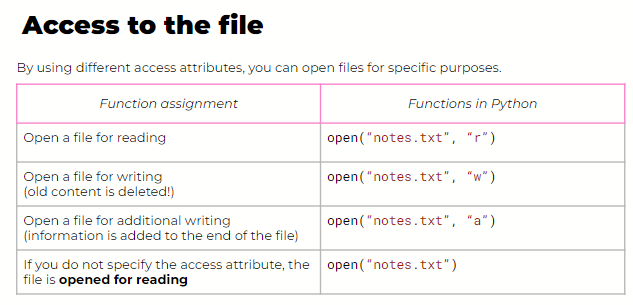

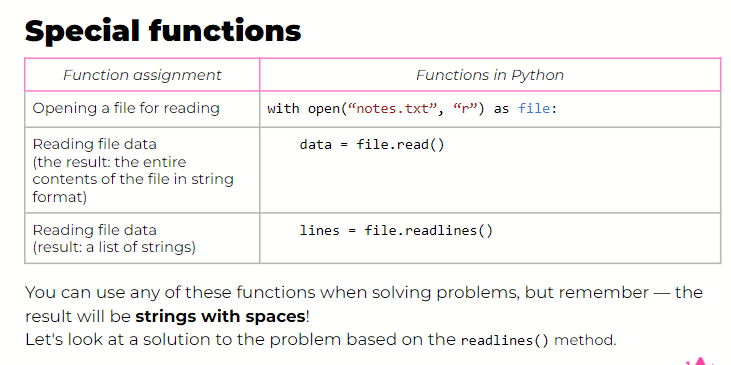

In [ ]:
with open('my_file.txt') as file: # buat baca file nya
    for item in file: # per baris
        # ubah stringnya jadi list
        item = item.split(' ')

        # ngembaliin seluruh simbol per baris
        for symbol in item:
            print(int(symbol) + 1)

with open('my_file.txt') as file:
    lines = file.readlines() # list string
    # print(lines)

    # angka ke-5 dari baris kedua
    # baris kedua
    second_line = lines[1].split(' ')
    second_line = list(map(int, second_line)) # mengubah semua datanya jadi integer
    print(second_line)
    # angka ke 5
    item = second_line[4]
    print(item + 1)

# nyari total jumlah angka 1
with open('my_file.txt') as file:
    lines = file.readlines() # list string per baris

    count = 0
    # split semua string barisnya
    for line in lines:
        line = line.split(' ') # 1 string/baris diubah jadi list
        line = list(map(int, line)) # ubah datanya jadi int semua

        for i in line: # elemen per baris
            if i == 1:
                count += 1

    print('Total angka 1:', count)







# Loading a map from a file


Game.py

In [ ]:
#write here a code for main window of the game
#write here code for app's main window
# connect base scene class
from direct.showbase.ShowBase import ShowBase
from mapmanager import *

class Game(ShowBase):
    def __init__(self):
        ShowBase.__init__(self)
        self.land = Mapmanager()
        self.land.loadLand("land.txt")
        self.land.loadLand("land2.txt")
        base.camLens.setFov(90)

game = Game()
game.run()

# Multi-colored map

mapmanager.py

In [ ]:
# write the code for creating and managing the map here
class Mapmanager():

    """ Managing map """
    def __init__(self):
        #   Load a block model, set a texture, create a property for the color, model and texture
        self.model = 'block.egg'
        self.texture = 'block.png'
        self.colors = [
            (0.5, 0.3, 0.0, 1),
            (0.2, 0.2, 0.3, 1),
            (0.5, 0.5, 0.2, 1),
            (0.0, 0.6, 0.0, 1)
        ] # rgba

        # create nodes
        self.startNew()
        # add block
        # self.addBlock((0, 10, 0))

    def startNew(self):
        self.land = render.attachNewNode("Land")

    def addBlock(self, position):
      self.block = loader.loadModel(self.model)
      self.block.setTexture(loader.loadTexture(self.texture))
      self.block.setPos(position)
      self.block.reparentTo(self.land)

      self.color = self.getColor(position[2]) # sesuai posisi z
      self.block.setColor(self.color)

    def getColor(self, z):
        if z < len(self.colors):
            return self.colors[z]
        else:
            return self.colors[-1]

    def clear(self):
        self.land.removeNode()
        self.startNew()

    def loadLand(self, filename):
        with open(filename) as file:
            y = 0
            for line in file:
                x = 0
                line = line.split(' ')
                for z in line:
                    for z0 in range(int(z)+1):
                        block = self.addBlock((x,y,z0))
                    x += 1
                y += 1


